In [1]:
#importing requried libraries
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df=pd.read_csv("Advertising.csv")

In [5]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

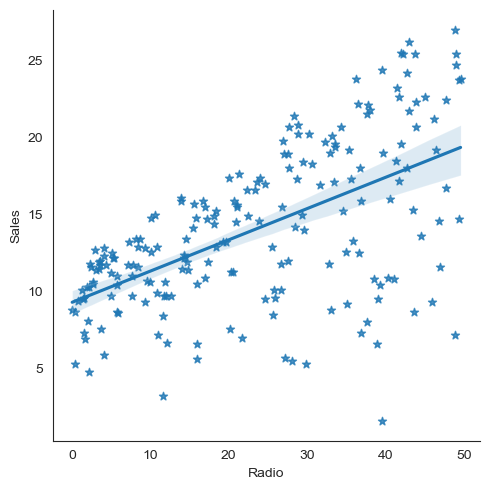

In [22]:
#some lmplots
sns.set_style('white')
sns.lmplot(x='Radio',y="Sales",data=df, markers=["*"])

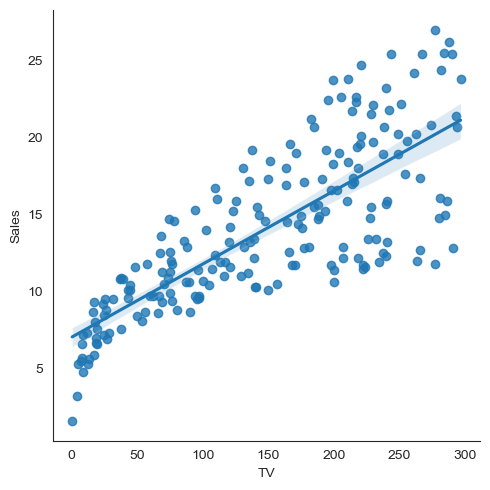

In [29]:
sns.set_style('white')
sns.lmplot(x='TV',y="Sales",data=df, markers=["o"])

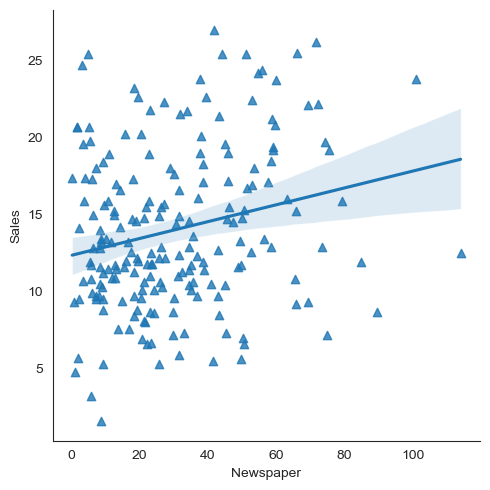

In [33]:
sns.set_style('white')
sns.lmplot(x='Newspaper',y="Sales",data=df, markers=["^"])

<Axes: >

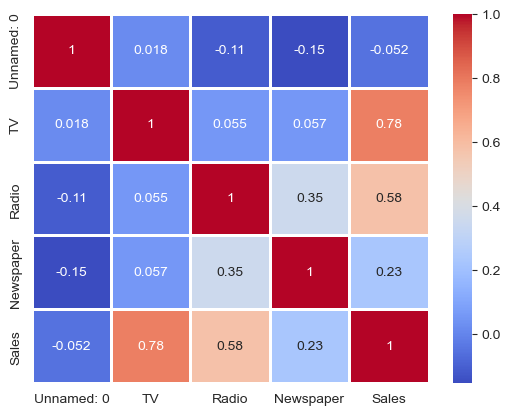

In [36]:
sns.heatmap(df.corr(),cmap='coolwarm',linecolor='white',linewidths=1,annot=True)

In [39]:
#sns.clustermap(df,cmap='coolwarm')

In [63]:
x=df.drop(['Sales','Unnamed: 0'],axis=1)
y=df['Sales']

In [64]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [65]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.6, random_state=0)

In [91]:
from sklearn.linear_model import LinearRegression

In [92]:
lr=LinearRegression()

In [93]:
lr.fit(x_train,y_train)

LinearRegression()

In [94]:
pre=lr.predict(x_test)

In [95]:
print(lr.intercept_)

2.8119370260970715


In [96]:
coeff_df = pd.DataFrame(lr.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.044405
Radio,0.196801
Newspaper,0.003678


In [97]:
real_predicted=pd.DataFrame(
    {
    'Actual':y_test.values.flatten(),
    'Predict':pre.flatten()
    }  
    )
real_predicted.head(10)

,Actual,Predict
0,11.3,9.986521
1,8.4,7.382776
2,8.7,6.970553
3,25.4,24.189173
4,11.7,12.034245
5,8.7,6.538526
6,7.2,13.097706
7,13.2,14.942305
8,9.2,11.018899
9,16.6,16.224127


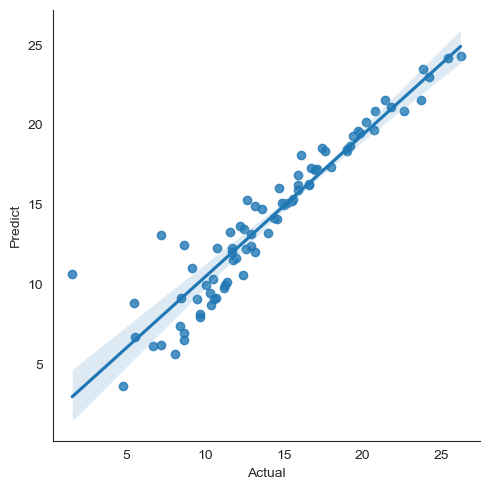

In [98]:
sns.lmplot(x='Actual',y="Predict",data=real_predicted)

In [99]:
from sklearn import metrics

In [100]:
print('MAE:', metrics.mean_absolute_error(y_test, pre))
print('MSE:', metrics.mean_squared_error(y_test, pre))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pre)))

MAE: 1.1234254447154508
MSE: 2.9569270836452946
RMSE: 1.7195717733334932


In [101]:
from sklearn.metrics import r2_score

In [102]:
print("r2_score:",r2_score(y_test,pre))

r2_score: 0.8876696235952205
